In [64]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.optimize import curve_fit, bisect

# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```







Text(4.6e-07, 200000, 'Espectro visible')

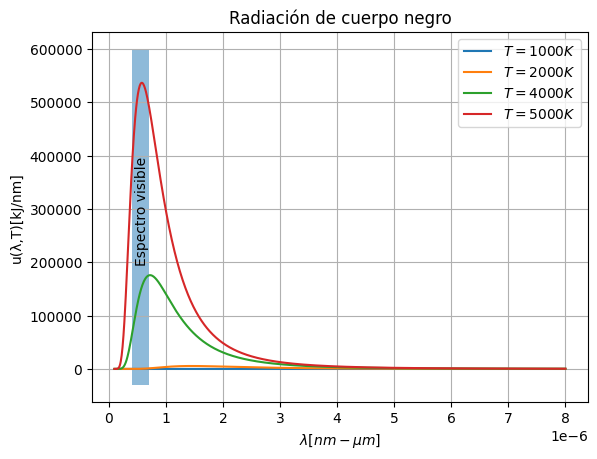

In [65]:
h_=6.62607015e-34
c_=299792458
k_B_=1.380649e-23

uλT=lambda λ,T:((8*np.pi*h_*c_)/(λ**5))*((1)/(np.exp((h_*c_)/(λ*k_B_*T))-1))

λ_=np.linspace(1e-7,8e-6,1000)           #desde 1e-7 en vez de 1e-9 porque ocurría un overflow para λ<=1e-8
#T_=np.array([_ for _ in range(1000,5100,100)])     #quería ver la gráfica para muchas temperaturas
T_=np.array([1000,2000,4000,5000])

for i in T_:
    plt.plot(λ_,uλT(λ_,i),label=f'$T={i}K$')

plt.title('Radiación de cuerpo negro')
plt.ylabel('u(λ,T)[kJ/nm]')
plt.xlabel('$λ[nm-\mu m]$')
plt.legend()
plt.grid()

plt.fill_betweenx(np.linspace(-30000, 600000), 400e-9, 700e-9, alpha=0.5,label='a')
plt.text(0.46e-6,200000,'Espectro visible',rotation=90)


2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$





λ=2.8977716922760013e-06,λmaxT=0.0028977716922760012mK
λ=1.448886251449585e-06,λmaxT=0.00289777250289917mK
λ=7.244421482086182e-07,λmaxT=0.0028977685928344727mK
λ=5.795549869537354e-07,λmaxT=0.002897774934768677mK


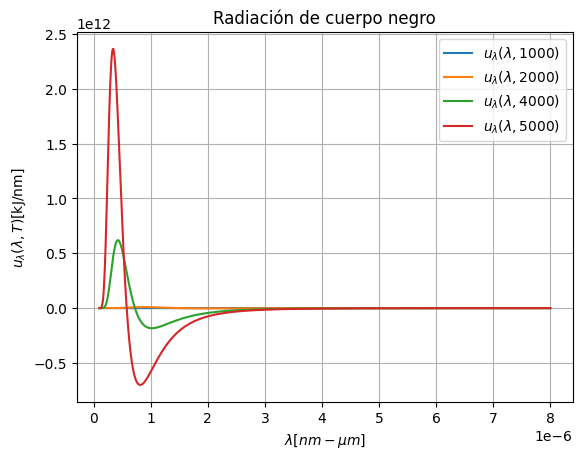

In [66]:
%matplotlib inline
h,c,λ,k_B,T=sp.symbols('h,c,λ,k_B,T')

uλT=((8*sp.pi*h*c)/(λ**5))*((1)/(sp.exp((h*c)/(λ*k_B*T))-1))
uλTp=sp.diff(uλT,λ,1)

uλTp_=sp.lambdify([h,c,λ,k_B,T],uλTp,'numpy')  #con esto saqué la expresión de abajo porque al querer utilizarla para los ceros había una división por cero que no supe evitar
u=lambda λ,h,c,k_B,T:-40*np.pi*c*h/(λ**6*(np.exp(c*h/(T*k_B*λ))-1))+8*np.pi*c**2*h**2*np.exp(c*h/(T*k_B*λ))/(T*k_B*λ**7*(np.exp(c*h/(T*k_B*λ))-1)**2)

for j in T_:
    param=(h_,c_,k_B_,j)
    root=bisect(u,0.1e-6,3e-6,args=param)
    print(f'λ={root},λmaxT={root*j}mK')
    plt.plot(λ_,uλTp_(h_,c_,λ_,k_B_,j),label=f'$u_λ(λ,{j})$')

plt.title('Radiación de cuerpo negro')
plt.ylabel('$u_λ(λ,T)$[kJ/nm]')
plt.xlabel('$λ[nm-\mu m]$')
plt.legend()
plt.grid()

3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado está acorde con los esperado?

C:\Users\crist\AppData\Local\Temp\ipykernel_11040\2418567309.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Ptotal[i]=c_/4*sc.integrate.quad(uλT,0,np.inf,args=(k,))[0]


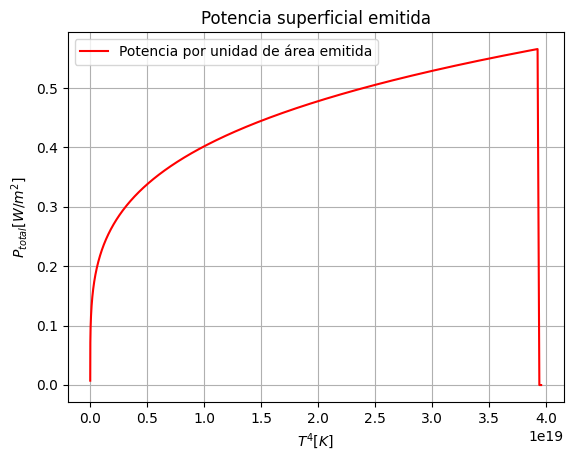

In [77]:
uλT=lambda λ,T:((8*np.pi*h_*c_)/(λ**5))*((1)/(np.exp((h_*c_)/(λ*k_B_*T))-1))

t=np.linspace(1000,79300,1000)
Ptotal=np.zeros(len(t))
for i,k in enumerate(t):
    Ptotal[i]=c_/4*sc.integrate.quad(uλT,0,np.inf,args=(k,))[0]

plt.plot(t**4,Ptotal,'r-',label='Potencia por unidad de área emitida')
plt.title('Potencia superficial emitida')
plt.ylabel('$P_{total}[W/m^2]$')
plt.xlabel('$T^4[K]$')
plt.legend()
plt.grid()

Este resultado podría esperarse dado que si aumenta la temperatura tambíen aumenta la potencia emitida, pero lo deberá hacer asintóticamente para valores de temperatura muy altos, porque si no tendríamos de cierta manera energía infinita. Este quiebre en la gráfica viene dado por el límite computacional dado que la integral para valores muy grandes converge extremadamente lento y cada vez es mucho más costoso calcularlas.

In [68]:
x=sp.symbols('x')
f=lambda x:x**3/(np.exp(x)-1)
P=sc.integrate.quad(f,0,np.inf)
valor=np.pi**4/15
valor,P

C:\Users\crist\AppData\Local\Temp\ipykernel_11040\1406153561.py:2: RuntimeWarning: overflow encountered in exp
  f=lambda x:x**3/(np.exp(x)-1)


(6.493939402266828, (6.49393940226683, 2.6284700358641423e-09))

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```






In [69]:
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]

data

,Año,NoSauvizado,Promedio_5
0,1880,-0.17,-0.09
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.21
4,1884,-0.29,-0.24
...,...,...,...
139,2019,0.98,0.94
140,2020,1.02,0.95
141,2021,0.85,0.98
142,2022,0.90,1.00


Realice lo siguiente en un gráfico combinado:

1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.

2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.

3. Analice el gráfico resultante y extraiga conclusiones.


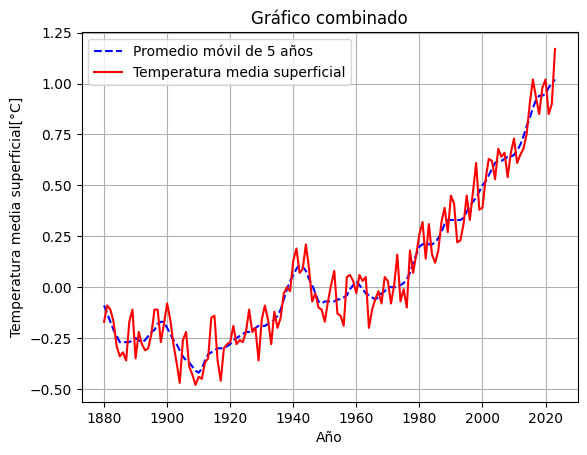

In [70]:
plt.plot(data['Año'],data['Promedio_5'],'b--',label='Promedio móvil de 5 años')
plt.plot(data['Año'],data['NoSauvizado'],'r-',label='Temperatura media superficial')
plt.title('Gráfico combinado')
plt.xlabel('Año')
plt.ylabel('Temperatura media superficial[°C]')
plt.grid()
plt.legend()

Podemos notar las fluctuaciones de la temperatura media superficial de la tierra debido a los cambios estacionarios de la misma, con el promedio móvil se hace un tratamiento para resaltar sin tanto ruido en los datos la tendencia de estos a lo largo del tiempo donde claramente se ve el incremento en la variación de la temperatura superficial media. Con unas anomalías excepcionales en años sospechosamente congruentes con los de la primera y segunda guerra mundial, entre muchos otros eventos probablemente. Connotando así los resultados de la carrera armamentística y a su vez el aumento sustancial en la liberación de gases de efecto invernadero en la atmósfera.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:

```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
```

 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.

,Año,NoSauvizado,Promedio_5
120,2000,0.39,0.50
121,2001,0.53,0.52
122,2002,0.63,0.55
123,2003,0.62,0.58
124,2004,0.53,0.61
125,2005,0.68,0.62
126,2006,0.64,0.62
127,2007,0.66,0.63
128,2008,0.54,0.64
129,2009,0.66,0.64


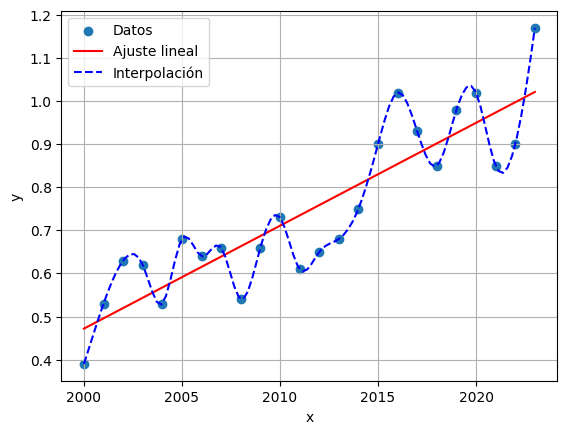

In [71]:
data=data.loc[data['Año']>=2000]

def linear_func(x, m, b):
    return m * x + b

x=data['Año']
y=data['NoSauvizado']

params,covariance=curve_fit(linear_func,x,y)

m,b=params

x_fit=np.linspace(min(x),max(x),100)
y_fit=linear_func(x_fit,m,b)

plt.scatter(x,y,label='Datos')
plt.plot(x_fit,y_fit,label='Ajuste lineal',color='red')

cb=sc.interpolate.CubicSpline(x,y)
plt.plot(x_fit,cb(x_fit),'b--',label='Interpolación')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
data

6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

En este caso, tenemos que los datos no son tan ruidosos como para que sea engorroso analizarlos, de modo que la interpolación es una mejor opción para analizar los cambios en la temperatura superficial, mientras que el ajuste lineal de los mismos es un poco impreciso a la hora de predecir comportamientos en el rango de meses a años.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.

Para una primera aproximación para la temperatura anómala se podría hacer un promedio móvil pero esta vez de 7 años para cubir hasta 2030 con los datos obtenidos hasta 2023. Para ellos a cada valor de $x$ (años), se le asigna el promedio de *la temeperatura superficial media*, tomando siete datos a izquierda y derecha de $x$ y luego hacer el promedio de este nuevo array.